# Simple Linear Regression

Objective: Predict Fuel Consumption ad CO2 Emission of Cars  
Ref: https://labs.cognitiveclass.ai/tools/jupyterlab/lab/tree/labs/coursera/ML0101EN/ML0101EN-Reg-Simple-Linear-Regression-Co2-py-v1.ipynb  
Dataset: https://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [2]:
#take out non categorical value
ncdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
print(ncdf.shape)
ncdf.head()

(1067, 4)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


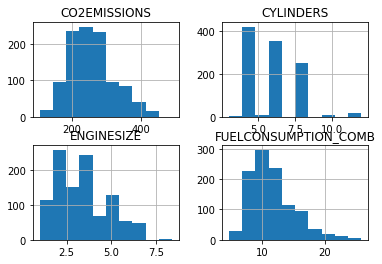

In [3]:
plot_ncdf = ncdf[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
plot_ncdf.hist()
plt.show()

In [4]:
ncdf.corr()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.819482,0.874154
CYLINDERS,0.934011,1.000000,0.776788,0.849685
FUELCONSUMPTION_COMB,0.819482,0.776788,1.000000,0.892129
CO2EMISSIONS,0.874154,0.849685,0.892129,1.000000


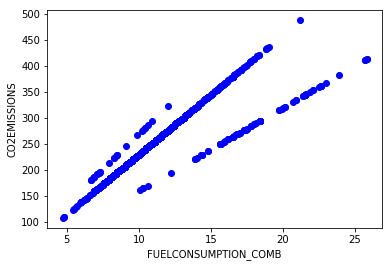

In [5]:
#Scatter PLot: CO2EMISSIONS VS FUELCONSUMPTION_COMB
plt.scatter(ncdf.FUELCONSUMPTION_COMB, ncdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

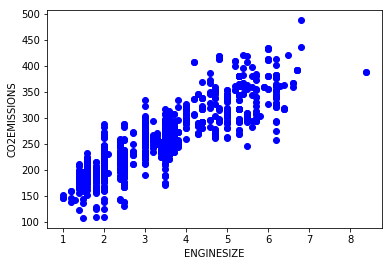

In [6]:
#Scatter PLot: CO2EMISSIONS VS ENGINESIZE
plt.scatter(ncdf.ENGINESIZE, ncdf.CO2EMISSIONS, color='blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("CO2EMISSIONS")
plt.show()

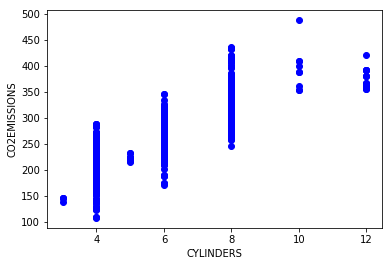

In [7]:
#Scatter PLot: CO2EMISSIONS VS CYLINDERS
plt.scatter(ncdf.CYLINDERS, ncdf.CO2EMISSIONS, color='blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [8]:
#Splitting dataset to 80:20 Train:Test
msk = np.random.rand(len(df)) < 0.8
train = ncdf[msk]
test = ncdf[~msk]

print(train.shape)
train.head()

(879, 4)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


# EngineSize vs C02 Emission

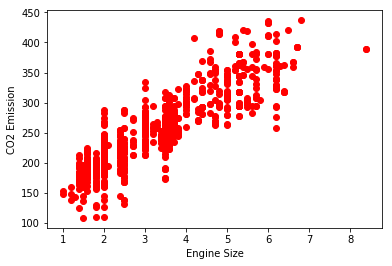

In [9]:
#Train Data Scatter Plot / Distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

In [10]:
#Using SKlearn Package to model data
from sklearn import linear_model
regr_en = linear_model.LinearRegression()
train_x1 = np.asanyarray(train[['ENGINESIZE']])
train_y1 = np.asanyarray(train[['CO2EMISSIONS']])
regr_en.fit(train_x1,train_y1)

print('Coefficient:', regr_en.coef_)
print('Intercept  :', regr_en.intercept_)

Coefficient: [[39.16979936]]
Intercept  : [124.50224012]


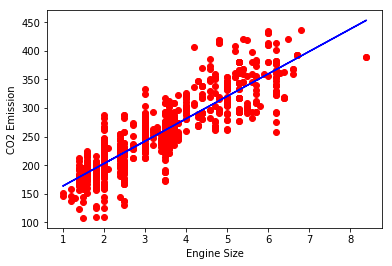

In [11]:
#Plot line into Scatter Plot 
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='red')
plt.plot(train_x1, regr_en.coef_[0][0] * train_x1 + regr_en.intercept_[0], '-b')
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emission")
plt.show()

In [12]:
#Check model accuracy
from sklearn.metrics import r2_score

test_x1 = np.asanyarray(test[['ENGINESIZE']])
test_y1 = np.asanyarray(test[['CO2EMISSIONS']])
test_y1_ = regr_en.predict(test_x1)

en_mae = np.mean(np.absolute(test_y1_ - test_y1))
en_mse = np.mean((test_y1_ - test_y1)**2)
en_r2 = r2_score(test_y1_ , test_y1)

print("Mean absolure error          : %.2f" % en_mae)
print("Residual sum of squares (MSE): %.2f" % en_mse)
print("R2-Score                     : %.2f" % en_r2)

Mean absolure error          : 22.60
Residual sum of squares (MSE): 906.52
R2-Score                     : 0.69


# Prediction Parameter

In [13]:
#Using the model
new_enginesize = 2
new_cylinders = 4
new_fuelcon = 8.5

In [14]:
pred_en = regr_en.predict([[new_enginesize]])
print("Using Engine Size     : %.2f" % (new_enginesize))
print("Predicted CO2 Emission: %.2f" % (pred_en))

Using Engine Size     : 2.00
Predicted CO2 Emission: 202.84


# Cylinders vs C02 Emission

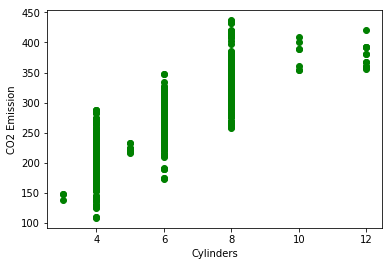

In [15]:
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color='green')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

Coefficient: [[30.28878538]]
Intercept  : [80.18441853]


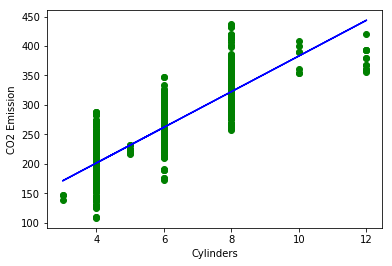

In [16]:
from sklearn import linear_model
regr_cy = linear_model.LinearRegression()
train_x2 = np.asanyarray(train[['CYLINDERS']])
train_y2 = np.asanyarray(train[['CO2EMISSIONS']])
regr_cy.fit(train_x2,train_y2)

print('Coefficient:', regr_cy.coef_)
print('Intercept  :', regr_cy.intercept_)

#Plot line into Scatter Plot 
plt.scatter(train.CYLINDERS, train.CO2EMISSIONS, color='green')
plt.plot(train_x2, regr_cy.coef_[0][0] * train_x2 + regr_cy.intercept_[0], '-b')
plt.xlabel("Cylinders")
plt.ylabel("CO2 Emission")
plt.show()

In [17]:
from sklearn.metrics import r2_score

test_x2 = np.asanyarray(test[['CYLINDERS']])
test_y2 = np.asanyarray(test[['CO2EMISSIONS']])
test_y2_ = regr_cy.predict(test_x2)

cy_mae = np.mean(np.absolute(test_y2_ - test_y2))
cy_mse = np.mean((test_y2_ - test_y2)**2)
cy_r2 = r2_score(test_y2_ , test_y2)

print("Mean absolure error          : %.2f" % cy_mae)
print("Residual sum of squares (MSE): %.2f" % cy_mse)
print("R2-Score                     : %.2f" % cy_r2)

pred_cy = regr_cy.predict([[new_cylinders]])
print("Using Engine Size     : %.2f" % (new_cylinders))
print("Predicted CO2 Emission: %.2f" % (pred_cy))

Mean absolure error          : 24.43
Residual sum of squares (MSE): 1052.79
R2-Score                     : 0.66
Using Engine Size     : 4.00
Predicted CO2 Emission: 201.34


# FuelConsumption Comb vs C02 Emission

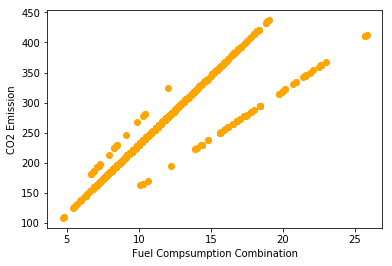

In [18]:
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='orange')
plt.xlabel("Fuel Compsumption Combination")
plt.ylabel("CO2 Emission")
plt.show()

Coefficient: [[16.26332654]]
Intercept  : [67.46735909]


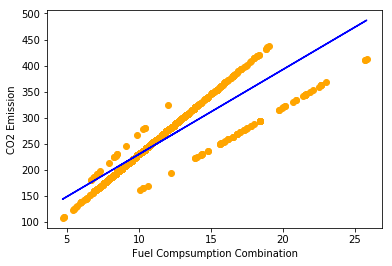

In [19]:
from sklearn import linear_model
regr_fc = linear_model.LinearRegression()
train_x3 = np.asanyarray(train[['FUELCONSUMPTION_COMB']])
train_y3 = np.asanyarray(train[['CO2EMISSIONS']])
regr_fc.fit(train_x3,train_y3)

print('Coefficient:', regr_fc.coef_)
print('Intercept  :', regr_fc.intercept_)

#Plot line into Scatter Plot 
plt.scatter(train.FUELCONSUMPTION_COMB, train.CO2EMISSIONS, color='orange')
plt.plot(train_x3, regr_fc.coef_[0][0] * train_x3 + regr_fc.intercept_[0], '-b')
plt.xlabel("Fuel Compsumption Combination")
plt.ylabel("CO2 Emission")
plt.show()

In [20]:
from sklearn.metrics import r2_score

test_x3 = np.asanyarray(test[['FUELCONSUMPTION_COMB']])
test_y3 = np.asanyarray(test[['CO2EMISSIONS']])
test_y3_ = regr_fc.predict(test_x3)

fc_mae = np.mean(np.absolute(test_y3_ - test_y3))
fc_mse = np.mean((test_y2_ - test_y3)**2)
fc_r2 = r2_score(test_y2_ , test_y3)

print("Mean absolure error          : %.2f" % fc_mae)
print("Residual sum of squares (MSE): %.2f" % fc_mse)
print("R2-Score                     : %.2f" % fc_r2)

pred_fc = regr_fc.predict([[new_fuelcon]])
print("Using FC     : %.2f" % (new_fuelcon))
print("Predicted CO2 Emission: %.2f" % (pred_fc))

Mean absolure error          : 19.09
Residual sum of squares (MSE): 1052.79
R2-Score                     : 0.66
Using FC     : 8.50
Predicted CO2 Emission: 205.71


# Conclusion 

In [21]:
print("Using Engine Size     : %.2f" % (new_enginesize))
print("Cylinders Size        : %.2f" % (new_cylinders))
print("Fuel Consumption      : %.2f" % (new_fuelcon))

print("                       | MeanAbs | MeanSqua | R2-Score | CO2 Prediction")
print("-----------------------------------------------------------------------")
print(f"EngineSize vs Emisson  |  {en_mae:.2f}  | {en_mse:.2f}   |  {en_r2:.2f}    | {pred_en}")
print(f"Cylinders vs Emisson   |  {cy_mae:.2f}  | {cy_mse:.2f}  |  {cy_r2:.2f}    | {pred_cy}")
print(f"FC vs Emisson          |  {fc_mae:.2f}  | {fc_mse:.2f}  |  {fc_r2:.2f}    | {pred_fc}")

Using Engine Size     : 2.00
Cylinders Size        : 4.00
Fuel Consumption      : 8.50
                       | MeanAbs | MeanSqua | R2-Score | CO2 Prediction
-----------------------------------------------------------------------
EngineSize vs Emisson  |  22.60  | 906.52   |  0.69    | [[202.84183885]]
Cylinders vs Emisson   |  24.43  | 1052.79  |  0.66    | [[201.33956007]]
FC vs Emisson          |  19.09  | 1052.79  |  0.66    | [[205.70563468]]
